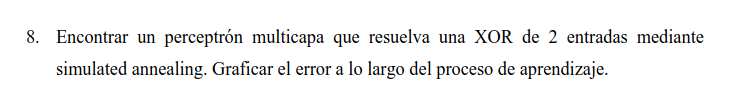

In [4]:
import numpy as np
import matplotlib.pyplot as plt


from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.bias_hidden = np.random.uniform(-0.5, 0.5, (1, hidden_size)) * 0.1
        self.bias_output = np.random.uniform(-0.5, 0.5, (1, output_size)) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.relu(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        return final_output

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def simulated_annealing(self, X, y, initial_temp=10000, final_temp=1, alpha=0.999, max_iter=500, best = True):
        current_temp = initial_temp
        current_weights_input_hidden = self.weights_input_hidden.copy()
        current_weights_hidden_output = self.weights_hidden_output.copy()
        current_bias_hidden = self.bias_hidden.copy()
        current_bias_output = self.bias_output.copy()
        best_loss = self.compute_loss(y, self.forward(X))
        best_weights_input_hidden = current_weights_input_hidden.copy()
        best_weights_hidden_output = current_weights_hidden_output.copy()
        best_bias_hidden = current_bias_hidden.copy()
        best_bias_output = current_bias_output.copy()
        errors = []
        best_errors = []

        iteration = 0
        while current_temp > final_temp:
            iteration += 1
            for _ in range(max_iter):
                # Se reduce los saltos en cada iteración
                #step_size = 1
                step_size = current_temp / initial_temp * 10
                # Se proponen pesos nuevos con ruido gaussiano
                new_weights_input_hidden = current_weights_input_hidden + np.random.normal(0, step_size, current_weights_input_hidden.shape)
                new_weights_hidden_output = current_weights_hidden_output + np.random.normal(0, step_size, current_weights_hidden_output.shape)
                new_bias_hidden = current_bias_hidden + np.random.normal(0, step_size, current_bias_hidden.shape)
                new_bias_output = current_bias_output + np.random.normal(0, step_size, current_bias_output.shape)

                self.weights_input_hidden = new_weights_input_hidden
                self.weights_hidden_output = new_weights_hidden_output
                self.bias_hidden = new_bias_hidden
                self.bias_output = new_bias_output

                y_pred = self.forward(X)
                new_loss = self.compute_loss(y, y_pred)

                delta_loss = new_loss - best_loss
                acceptance_probability = np.exp(-delta_loss / current_temp) if delta_loss > 0 else 1

                if acceptance_probability > np.random.rand():
           
                    current_weights_input_hidden = new_weights_input_hidden
                    current_weights_hidden_output = new_weights_hidden_output
                    current_bias_hidden = new_bias_hidden
                    current_bias_output = new_bias_output
                    if new_loss < best_loss:
                        best_loss = new_loss
                        best_weights_input_hidden = new_weights_input_hidden.copy()
                        best_weights_hidden_output = new_weights_hidden_output.copy()
                        best_bias_hidden = new_bias_hidden.copy()
                        best_bias_output = new_bias_output.copy()

            best_errors.append(best_loss)
            errors.append(new_loss)
            current_temp *= alpha

            if iteration % 10 == 0:
                print(f"Iteración {iteration}, Temperatura {current_temp:.2f}, Mejor Error {best_loss:.6f}, Error Real {new_loss:.6f}")

        # Guarda los mejores pesos
        if best == True:
            self.weights_input_hidden = best_weights_input_hidden
            self.weights_hidden_output = best_weights_hidden_output
            self.bias_hidden = best_bias_hidden
            self.bias_output = best_bias_output
        else:
            self.weights_input_hidden = current_weights_input_hidden
            self.weights_hidden_output = current_weights_hidden_output
            self.bias_hidden = current_bias_hidden
            self.bias_output = current_bias_output

        return best_errors, errors

/tmp/ipykernel_318702/1696954394.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteración 10, Temperatura 297.01, Mejor Error 0.250000, Error Real 0.500000
Iteración 20, Temperatura 294.06, Mejor Error 0.250000, Error Real 0.500000
Iteración 30, Temperatura 291.13, Mejor Error 0.250000, Error Real 0.500000
Iteración 40, Temperatura 288.23, Mejor Error 0.250000, Error Real 0.500000
Iteración 50, Temperatura 285.36, Mejor Error 0.250000, Error Real 0.500000
Iteración 60, Temperatura 282.52, Mejor Error 0.250000, Error Real 0.500000
Iteración 70, Temperatura 279.71, Mejor Error 0.000000, Error Real 0.500000
Iteración 80, Temperatura 276.92, Mejor Error 0.000000, Error Real 0.500000
Iteración 90, Temperatura 274.17, Mejor Error 0.000000, Error Real 0.250000
Iteración 100, Temperatura 271.44, Mejor Error 0.000000, Error Real 0.750000
Iteración 110, Temperatura 268.74, Mejor Error 0.000000, Error Real 0.750000
Iteración 120, Temperatura 266.06, Mejor Error 0.000000, Error Real 0.250000
Iteración 130, Temperatura 263.41, Mejor Error 0.000000, Error Real 0.250000
Iteració

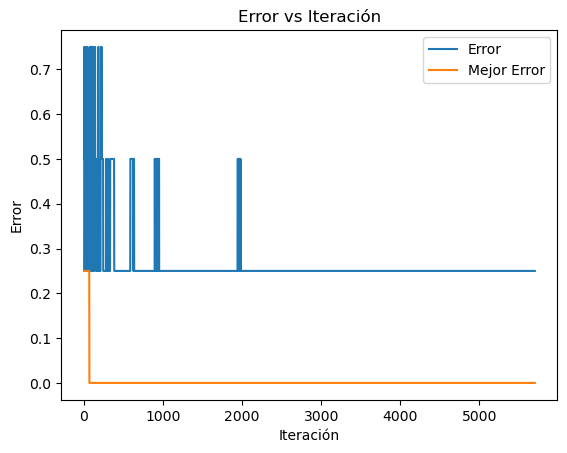

Predicciones:
Input: [0 0], Predecido: 0.0000, Esperado: 0
Input: [0 1], Predecido: 1.0000, Esperado: 1
Input: [1 0], Predecido: 1.0000, Esperado: 1
Input: [1 1], Predecido: 0.0000, Esperado: 0


In [17]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])
mlp = MLP(input_size=2, hidden_size=75, output_size=1)

best_errors, errors = mlp.simulated_annealing(
    X, y,
    initial_temp=300,
    final_temp=1,
    alpha=0.999,
    max_iter=2000,
    best = True
)
plt.plot(errors)
plt.plot(best_errors)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.legend(['Error', 'Mejor Error'])
plt.title('Error vs Iteración')
plt.show()

outputs = mlp.forward(X)
print("Predicciones:")
for input_data, output, target in zip(X, outputs, y):
    print(f"Input: {input_data}, Predecido: {output[0]:.4f}, Esperado: {target[0]}")

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, input_dimension, num_neurons, initial_radius, learning_rate, decay_rate, min_radius):
        self.input_dimension = input_dimension
        self.num_neurons = num_neurons
        self.radius = initial_radius
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.min_radius = min_radius
        self.weights = np.random.uniform(-0.01, 0.01, (num_neurons, input_dimension))
        self.grid_size = int(math.sqrt(num_neurons))  # Tamaño de la cuadrícula

    def train(self, training_data, circular=False):

        while self.radius > self.min_radius:
            np.random.shuffle(training_data)
            
            for input_vector in training_data:
                distances = np.array([np.sqrt(np.sum((input_vector - w)**2)) for w in self.weights])
                winner_idx = np.argmin(distances)
                
                if circular:
                    # Topología circular
                    neighborhood = self._calculate_circular_neighborhood(winner_idx)
                else:
                    # Topología de cuadriculada
                    neighborhood = self._calculate_grid_neighborhood(winner_idx)
                
                self._update_weights(input_vector, neighborhood)
            
            self.radius -= self.radius * self.decay_rate
            
        return self.weights
    
    def _calculate_circular_neighborhood(self, winner_idx):
        angles = np.array([[math.sin(2*math.pi/self.num_neurons*i), 
                           math.cos(2*math.pi/self.num_neurons*i)] 
                          for i in range(self.num_neurons)])
        winner_angle = angles[winner_idx]
        
        distances = np.sqrt(np.sum((angles - winner_angle)**2, axis=1))
        return np.exp(-distances**2 / (2 * self.radius**2))
    
    def _calculate_grid_neighborhood(self, winner_idx):
        winner_pos = np.array([winner_idx // self.grid_size, winner_idx % self.grid_size])
        
        neighborhood = np.array([[np.exp(-np.sum((np.array([i, j]) - winner_pos)**2) / 
                                       (2 * self.radius**2))
                                for j in range(self.grid_size)]
                               for i in range(self.grid_size)])
        
        return neighborhood.flatten()
    
    def _update_weights(self, input_vector, neighborhood):
        for i in range(self.num_neurons):
            self.weights[i] += (self.learning_rate * neighborhood[i] * 
                              (input_vector - self.weights[i]))

In [14]:
N = 100
M = int(math.sqrt(N))
x = np.random.uniform(-1, 1, N)
y = np.array([np.random.uniform(-math.sqrt(1 - v**2), math.sqrt(1 - v**2)) for v in x ])
circle_arr = np.array([[x[i], y[i]] for i in range(N)])

som = SOM(2, 15*15, 10, 0.1, 0.01, 0.01)
W = som.train(circle_arr)

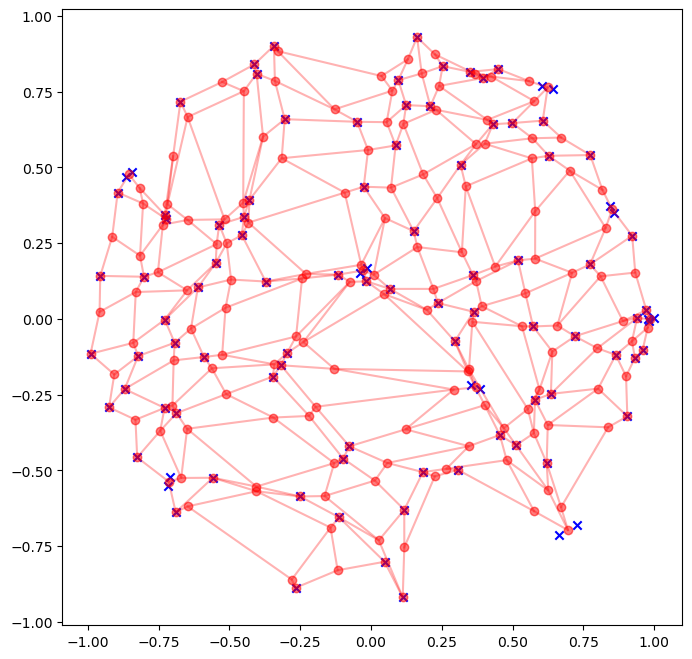

In [34]:
plt.figure(figsize=(8, 8))
plt.plot(W[:, 0].reshape(15,15), W[:, 1].reshape(15,15), c='red', marker='o', alpha=0.3)
plt.plot(np.transpose(W[:, 0].reshape(15,15)), np.transpose(W[:, 1].reshape(15,15)), c='red', marker='o', alpha=0.3)
plt.scatter(circle_arr[:, 0], circle_arr[:, 1], c='blue', marker='x', label='Original Data')
plt.show()

2. Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con
una red de Kohonen

In [5]:
num_cities = 200
cities = np.random.uniform(0, 1, size=(num_cities, 2))
som2 = SOM(2, 2*num_cities, 10, 0.1, 0.01, 0.01)
W_2 = som2.train(cities, circular=True)

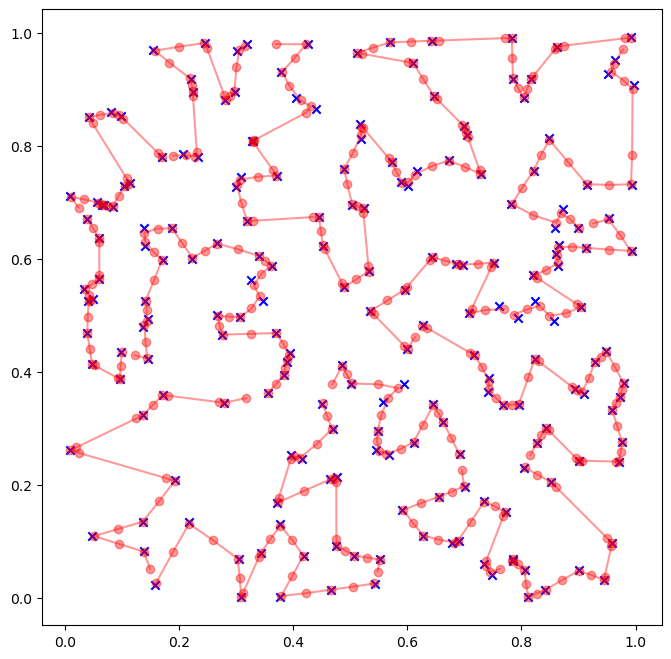

In [14]:
plt.figure(figsize=(8, 8))
##plt.plot(W_2[:, 0].reshape(20,20), W_2[:, 1].reshape(20,20), c='red', marker='o', alpha=1)
plt.plot(np.transpose(W_2[:, 0].reshape(20,20)), np.transpose(W_2[:, 1].reshape(20,20)), c='red', marker='o', alpha=0.4)
plt.scatter(cities[:, 0], cities[:, 1], c='blue', marker='x', label='Original Data')
plt.show()